In [1]:
import re
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, BayesianRidge, Ridge, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

In [2]:
train=pd.read_csv('house-prices-advanced-regression-techniques/train_nobc.csv')
test=pd.read_csv('house-prices-advanced-regression-techniques/test_nobc.csv')
y_train=pd.read_csv('house-prices-advanced-regression-techniques/y_train_clean.csv')
y_train=np.ravel(y_train['SalePrice'])

In [3]:
train.shape
test.shape
y_train.shape

(1417, 209)

(1459, 209)

(1417,)

In [4]:
test_1 = pd.read_csv('house-prices-advanced-regression-techniques/result-with-best.csv')

def kaggle(y_pred):
    score = mean_squared_error(y_true=np.log1p(test_1['SalePrice']), y_pred=np.log1p(y_pred), squared=False)
    return print('kaggle score is:', score)

#### Scaling

In [5]:
scaler=preprocessing.RobustScaler()
scaler.fit(train, test)
train = scaler.transform(train)
test = scaler.transform(test)

RobustScaler()

#### Model scoring w/ 5-fold CV, random_state = 20

In [6]:
random_state = 30
kf = KFold(n_splits= 5, shuffle=True, random_state = random_state)

In [7]:
def rmse_score(model, x=train, y=y_train):
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=kf))
    return print('mean=', rmse.mean(), "std=", rmse.std())

#### Model fitting and outputting

In [8]:
def output(model, test=test, filename=''):
    y_test = model.predict(test)
    y_pred = np.expm1(y_test)
    score = kaggle(y_pred)
   
    if filename != '':
        submission = pd.read_csv("house-prices-advanced-regression-techniques/sample_submission.csv")
        submission['SalePrice'] = y_pred
        submission.to_csv('house-prices-advanced-regression-techniques/'+filename+'.csv', index=False)
        print('output to file:', filename+'.csv')
    
    return sns.boxplot(x=y_test), score

#### OLS

mean= 0.11761866997031714 std= 0.01115680093908271
kaggle score is: 0.15060852833140415


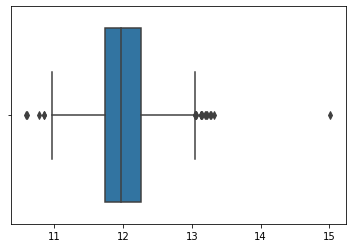

In [9]:
linear_reg = pipeline.Pipeline([("linear", LinearRegression())])

rmse_score(linear_reg)
linear_reg.fit(train, y_train)
output(model=linear_reg);

#### Lasso 

In [10]:
lasso = Lasso(alpha=0.00019919839679358718, max_iter=1e7, tol=0.001)

Lasso(alpha=0.00019919839679358718, max_iter=10000000.0, tol=0.001)

mean= 0.10797147162081962 std= 0.013293102014718176
kaggle score is: 0.1393742113144911


(<AxesSubplot:>, None)

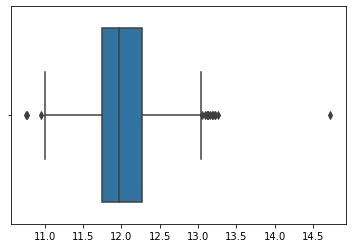

In [11]:
lasso.fit(train,y_train)
rmse_score(lasso)
output(lasso)

#### Ridge

In [12]:
ridge = Ridge(alpha=11.631631631631633, max_iter=1e7, tol=0.001)

mean= 0.10843958619699837 std= 0.015286515135555007
kaggle score is: 0.1411652268456976


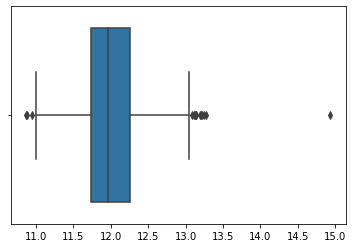

In [13]:
ridge.fit(train, y_train)
rmse_score(ridge)
output(ridge);

#### Elastic Net

mean= 0.10776900209826086 std= 0.015297386265120979
kaggle score is: 0.13692945666435985


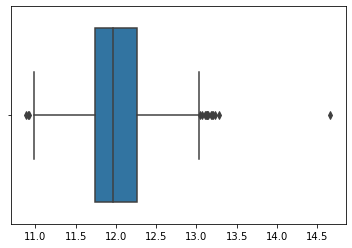

In [14]:
elasticnet = pipeline.Pipeline([("elastic_net", ElasticNet(l1_ratio=0.036756756756756756,
                                                                alpha=0.00714308617234469,
                                                          max_iter=1e7,
                                                          tol= 0.001,
                                                          random_state=random_state))])
elasticnet.fit(train, y_train)
rmse_score(elasticnet)
output(model=elasticnet);

#### Bayesian Ridge

mean= 0.10845158789707628 std= 0.015338504102039746
kaggle score is: 0.14100378805578934


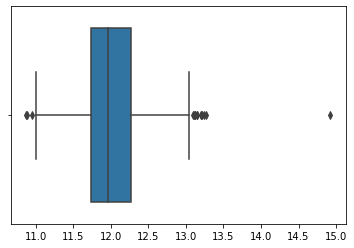

In [15]:
bayesianridge = BayesianRidge()
bayesianridge.fit(train, y_train)
rmse_score(bayesianridge)
output(model=bayesianridge);

#### SVR

In [16]:
from sklearn import svm

mean= 0.16078873710981617 std= 0.009769470493960875
kaggle score is: 0.18329996741220947


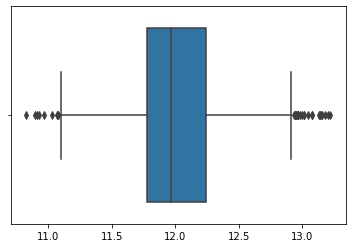

In [17]:
svr_reg = pipeline.Pipeline([("svr", svm.SVR(C=46,
                                             epsilon= 0.00902,
                                            gamma= 0.000343
                             ))])

svr_reg.fit(train, y_train)
rmse_score(svr_reg)
output(model=svr_reg);

#### Stacking

In [18]:
from sklearn.ensemble import  GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import  StackingCVRegressor


In [19]:
models=(linear_reg, lasso, ridge, elasticnet, bayesianridge, svr_reg)

stackingcv=StackingCVRegressor(regressors=models, meta_regressor=elasticnet,
                                   use_features_in_secondary=True)

rmse_score(stackingcv)

mean= 0.10743844136867335 std= 0.01508846387408511


StackingCVRegressor(meta_regressor=Pipeline(steps=[('elastic_net',
                                                    ElasticNet(alpha=0.00714308617234469,
                                                               l1_ratio=0.036756756756756756,
                                                               max_iter=10000000.0,
                                                               random_state=30,
                                                               tol=0.001))]),
                    regressors=(Pipeline(steps=[('linear',
                                                 LinearRegression())]),
                                Lasso(alpha=0.00019919839679358718,
                                      max_iter=10000000.0, tol=0.001),
                                Ridge(alpha=11.631631631631633,
                                      max_iter=10000000.0),
                                Pipeline(steps=[('elastic_net',
                                                 

kaggle score is: 0.1360785267838249


(<AxesSubplot:>, None)

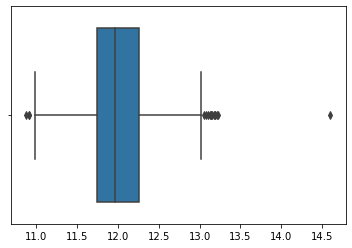

In [20]:
stackingcv.fit(train, y_train)
output(model=stackingcv)